In [2]:
import numpy as np

# Create a 2D NumPy array
array = np.array([[1, 2, 3], [4, 5, 6]])

# Basic operations
sum_all = np.sum(array)
mean_all = np.mean(array)
transposed = array.T

print("Original array:\n", array)
print("Sum of all elements:", sum_all)
print("Mean of all elements:", mean_all)
print("Transposed array:\n", transposed)

Original array:
 [[1 2 3]
 [4 5 6]]
Sum of all elements: 21
Mean of all elements: 3.5
Transposed array:
 [[1 4]
 [2 5]
 [3 6]]


In an List, data types get converted to same 

in an array, data types are retained


In [4]:
import numpy as np

print("NumPy version:", np.__version__)

sample_array = np.array([1, 2, 3])  # Example usage of np.array

print(2 * sample_array)  # Element-wise multiplication

NumPy version: 1.26.4
[2 4 6]


In [5]:
# Matrix in NumPy

matrix = np.array([[1, 2], [3, 4]])
print("Matrix:\n", matrix)

Matrix:
 [[1 2]
 [3 4]]


In [6]:
np.random.seed(0)  # For reproducibility
np.random.randint(0,10,(3,3))  # Generate a 3x3 matrix with random integers between 0 and 10

array([[5, 0, 3],
       [3, 7, 9],
       [3, 5, 2]])

In [7]:
np.zeros((3, 3))  # Create a 3x3 matrix filled with zeros


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [9]:
# np.concat((np.zeros((3, 3)), np.ones((3, 3))), axis=1)  # Concatenate two matrices along columns

import numpy as np

np.concatenate((np.zeros((3, 3)), np.ones((3, 3))), axis=1)


array([[0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.]])

In [10]:
import scipy as sp

sp.__version__

'1.16.0'

In [11]:
import numpy as np
from scipy.optimize import approx_fprime

def my_function(x):
    return x**2 + x + 1

# Calculate the derivative at x=2
x = np.array([2.0])  # approx_fprime expects a numpy array
epsilon = np.sqrt(np.finfo(float).eps) # A small step size for numerical approximation
derivative_value = approx_fprime(x, my_function, epsilon)

print(derivative_value)

[5.]


In [13]:
import pandas as pd

pd.__version__

'2.2.2'

In [15]:
data = pd.read_csv("employees_data.csv")

print(data.head())  # Display the first few rows of the DataFrame

  EmployeeID      FullName       Department               JobTitle  \
0      E1001  Aarav Sharma            Sales        Sales Associate   
1      E1002  Saanvi Patel        Marketing  Marketing Coordinator   
2      E1003  Vikram Singh      Engineering      Software Engineer   
3      E1004  Ananya Reddy  Human Resources          HR Generalist   
4      E1005   Rohan Gupta               IT  IT Support Specialist   

  OfficeLocation    HireDate  SalaryUSD  PerformanceRating  
0         Mumbai  2023-02-15      55000                  4  
1          Delhi  2022-09-20      62000                  5  
2      Bangalore  2021-11-01      95000                  4  
3      Hyderabad  2024-01-10      58000                  3  
4        Kolkata  2023-07-22      51000                  5  


In [17]:
data.dtypes

EmployeeID           object
FullName             object
Department           object
JobTitle             object
OfficeLocation       object
HireDate             object
SalaryUSD             int64
PerformanceRating     int64
dtype: object

In [18]:
data.describe()  # Get a summary of the DataFrame

,SalaryUSD,PerformanceRating
count,30.000000,30.000000
mean,80200.000000,4.166667
std,23637.200371,0.746640
min,51000.000000,3.000000
25%,61250.000000,4.000000
50%,76000.000000,4.000000
75%,91500.000000,5.000000
max,145000.000000,5.000000


In [22]:
import matplotlib as plt

plt.__version__  # Check matplotlib version

'3.8.0'

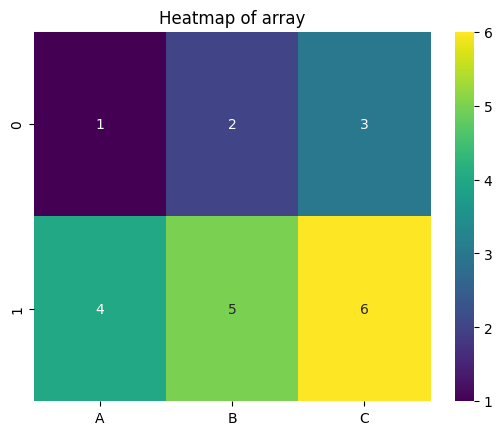

In [3]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

# Convert the NumPy array to a DataFrame for easier plotting with seaborn
df = pd.DataFrame(array, columns=['A', 'B', 'C'])

# Create a heatmap using seaborn
sns.heatmap(df, annot=True, cmap='viridis')
plt.title('Heatmap of array')
plt.show()

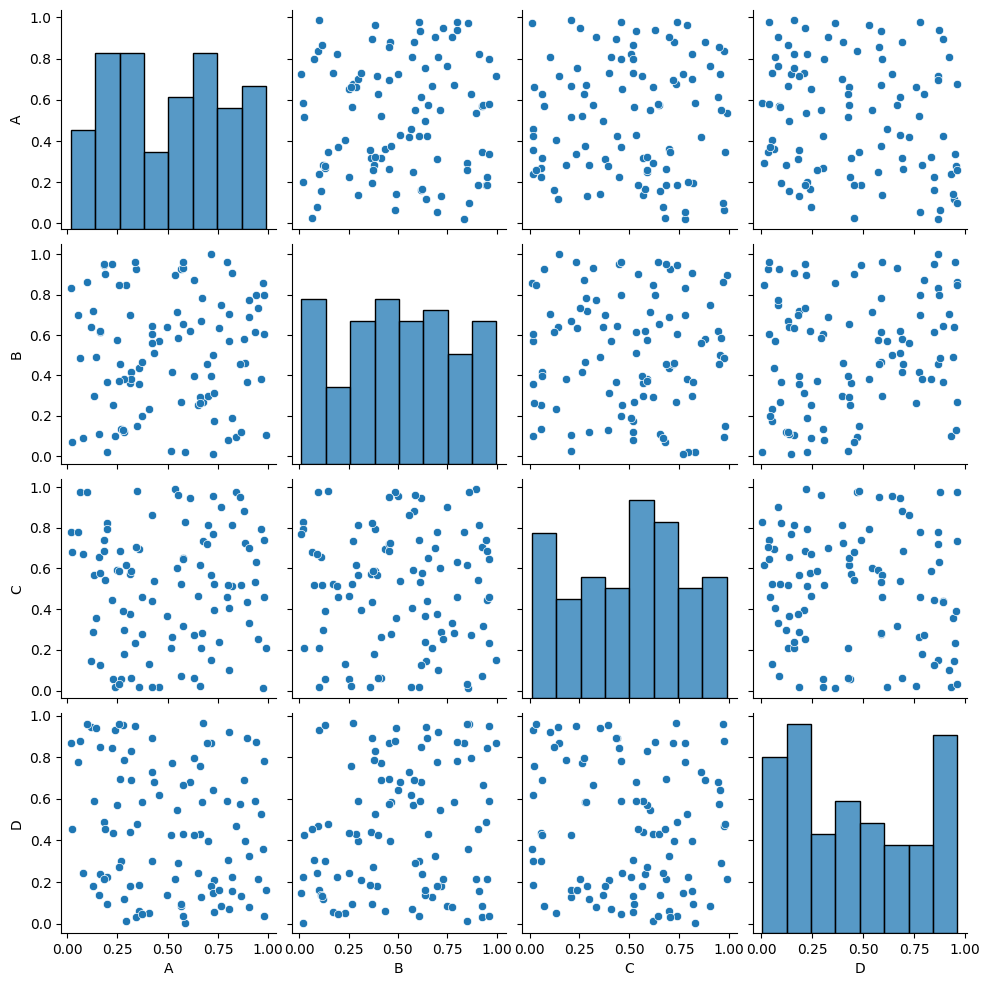

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Generate sample data using numpy
np.random.seed(0)
data = np.random.rand(100, 4)
df = pd.DataFrame(data, columns=['A', 'B', 'C', 'D'])

# Plot using seaborn pairplot
sns.pairplot(df)
plt.show()


# Scikit Learn

- Data pre processing
        - fill missing values
        - encode
        - Normalize data

- Model Building 
        - identify
        - predict
    
- Automating the process
        - create pipeliens

In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import sklearn as sk
import numpy as np

Cross-Validation Scores: [0.2 0.2 0.3]
Average CV Score: 0.23

Feature Importances:

                importance
SalaryUSD         0.442266
JobTitle          0.249677
OfficeLocation    0.178508
Department        0.129548

Feature importance visualization saved as 'feature_importances.png'


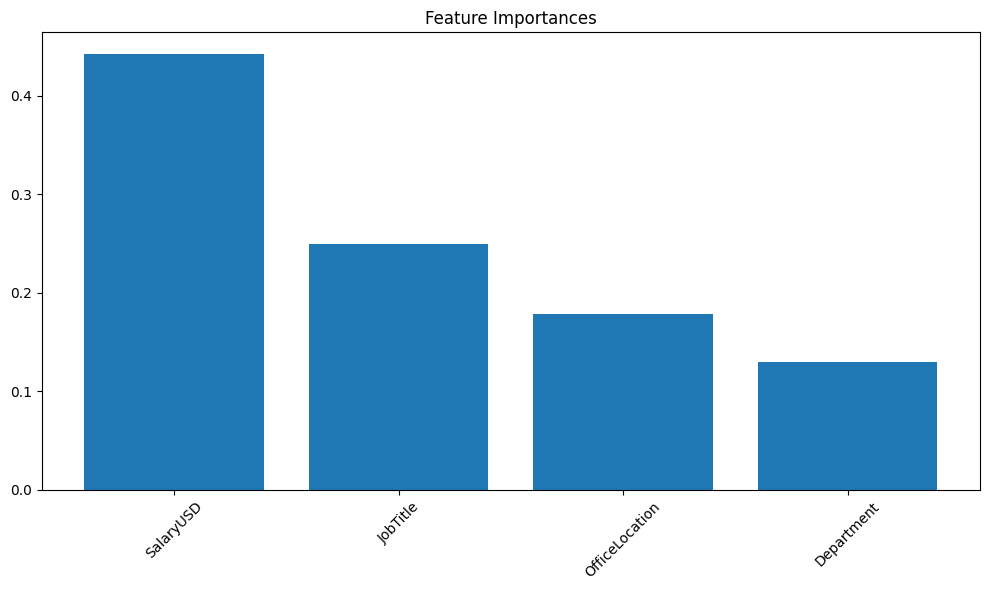

In [4]:

import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
try:
    data = pd.read_csv('employees_data.csv')
except FileNotFoundError:
    print("Error: 'employees_data.csv' not found. Make sure the file is in the correct directory.")
    exit()

# Drop unnecessary columns
data = data.drop(['EmployeeID', 'FullName', 'HireDate'], axis=1)

# Handle categorical variables
categorical_cols = ['Department', 'JobTitle', 'OfficeLocation']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Define features (X) and target (y)
X = data.drop('PerformanceRating', axis=1)
y = data['PerformanceRating']

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
# Using cv=5, but you can adjust this based on the dataset size.
# For small datasets, a smaller number of folds might be necessary.
# The number of folds cannot be greater than the number of samples in the smallest class.
cv_scores = cross_val_score(model, X, y, cv=3) # Reduced to 3 folds due to small class sizes

# Print the cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {np.mean(cv_scores):.2f}")

# To show feature importances, we still need to train the model on the full dataset
model.fit(X, y)

# Feature Importance
print("\nFeature Importances:\n")
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

# Visualize Feature Importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(feature_importances.index, feature_importances['importance'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('feature_importances.png')
print("\nFeature importance visualization saved as 'feature_importances.png'")
